In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from autocrop import crop
import cv2

Importing images and titles ('class') into arrays

In [137]:
def create_dataset(img_folder):
    """
    img_folder is the directory.
    Imports images that are in files with similar types ie the img_folder contains folders with images in folders of the same input copy
    """ 

    df = pd.DataFrame(columns=['Image', 'Copy number']) #load images into dataframe
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)): #images are stored in directories of input copy numbers
            image_path= os.path.join(img_folder, dir1,  file)
            image= crop(image_path) #apply cropping and contrasting 
            image = image.astype('int') # 8 bit image, intensties are whole numbers ie ints
            df = df.append({'Image': image, 'Copy number':dir1}, ignore_index=True) #populating columns of dataframe
    return df# extract the image array and class name

In [138]:
data =create_dataset(r'../dataset/All') #calling function to make datasets

In [182]:
array = data.to_numpy() #verifing shape and structure of array
array

array([[array([[10, 10, 10, ...,  5,  5,  5],
               [ 9,  9,  9, ...,  4,  4,  4],
               [ 9,  9,  9, ...,  4,  4,  4],
               ...,
               [ 2,  2,  1, ...,  6,  6,  6],
               [ 2,  2,  2, ...,  6,  6,  6],
               [ 2,  2,  2, ...,  6,  6,  6]]), '100'],
       [array([[6, 6, 6, ..., 6, 6, 6],
               [6, 6, 6, ..., 6, 6, 6],
               [6, 6, 6, ..., 6, 6, 6],
               ...,
               [1, 1, 1, ..., 6, 6, 6],
               [1, 1, 1, ..., 6, 6, 6],
               [1, 1, 1, ..., 6, 6, 6]]), '100'],
       [array([[6, 7, 7, ..., 5, 5, 5],
               [6, 7, 7, ..., 5, 5, 4],
               [7, 7, 7, ..., 4, 4, 4],
               ...,
               [1, 1, 1, ..., 4, 5, 5],
               [1, 1, 1, ..., 5, 5, 5],
               [1, 1, 1, ..., 5, 5, 6]]), '100'],
       [array([[9, 9, 9, ..., 5, 5, 5],
               [8, 8, 8, ..., 5, 5, 5],
               [9, 9, 9, ..., 5, 5, 5],
               ...,
              

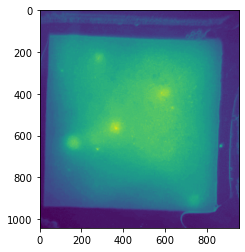

In [168]:
plt.imshow(array[0][0]) #intexting the first image, array[i][j]-> i is the number of arrays in range of number of images,
                        # j=0 is eelecting image array, j=1 is the input copy number 

In [172]:
np.save('QIAML_All_Data', array) #saving to .npy file, unresolved str issues with pd.to_csv

In [176]:
array2 = np.load('QIAML_All_Data.npy', allow_pickle=True) #validating save by reloading array

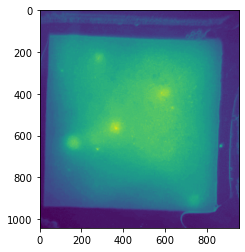

In [177]:
plt.imshow(array2[0][0]) #validating save by reloading array

                                               Images Copy number
0   [[10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,...         100
1   [[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 7,...         100
2   [[6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,...         100
3   [[9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,...        1000
4   [[11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, ...        1000
5   [[7, 7, 8, 8, 8, 7, 7, 7, 8, 8, 7, 6, 6, 6, 6,...        1000
6   [[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,...       10000
7   [[4, 4, 5, 5, 6, 6, 5, 5, 4, 4, 4, 4, 5, 5, 5,...       10000
8   [[7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 6, 6,...       10000
9   [[6, 6, 7, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,...      100000
10  [[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 8, 8, 8,...          30
11  [[8, 8, 9, 11, 10, 10, 10, 10, 9, 9, 8, 8, 9, ...          30
12  [[4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 4, 4, 4, 4, 4,...          30
13  [[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,...         300
14  [[5, 5

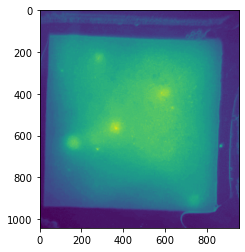

In [183]:
df3 = pd.DataFrame(np.load('QIAML_All_Data.npy',allow_pickle=True), columns = ['Images', 'Copy number'])
print (df3) #displaying dataset in dataframe that is easier to read
plt.imshow(df3.iloc[0,0])

___
# Unresolved str error in pd.df.to_csv


Putting data into dataframe to make CSV and make it distribuatable

In [141]:
data.to_csv('QIAML_All_Data.csv', index=False, compression=None)

Below this point, these cells need IJ not K data sets to work

In [142]:
df2 = pd.read_csv('QIAML_All_Data.csv')
df2 = df2.replace(r'\n',' ', regex=True) 
df2

Image  Copy number
0   [[10 10 10 ...  5  5  5]  [ 9  9  9 ...  4  4 ...          100
1   [[6 6 6 ... 6 6 6]  [6 6 6 ... 6 6 6]  [6 6 6 ...          100
2   [[6 7 7 ... 5 5 5]  [6 7 7 ... 5 5 4]  [7 7 7 ...          100
3   [[9 9 9 ... 5 5 5]  [8 8 8 ... 5 5 5]  [9 9 9 ...         1000
4   [[11 11 11 ...  2  2  2]  [11 11 11 ...  2  2 ...         1000
5   [[7 7 8 ... 2 2 2]  [7 6 7 ... 2 2 2]  [6 6 6 ...         1000
6   [[6 6 6 ... 0 0 0]  [6 6 6 ... 0 0 0]  [6 6 6 ...        10000
7   [[ 4  4  5 ... 12 12 12]  [ 4  4  5 ... 11 12 ...        10000
8   [[7 7 7 ... 2 1 1]  [8 7 7 ... 2 1 1]  [8 7 7 ...        10000
9   [[6 6 7 ... 4 4 4]  [6 6 6 ... 4 4 4]  [5 6 6 ...       100000
10  [[8 8 8 ... 0 0 0]  [8 8 8 ... 0 0 0]  [8 8 8 ...           30
11  [[8 8 9 ... 4 4 4]  [9 8 9 ... 4 4 4]  [9 9 9 ...           30
12  [[ 4  4  4 ... 11  9  9]  [ 5  5  5 ...  9  9 ...           30
13  [[ 8  8  8 ...  8  9  9]  [ 9  9  8 ...  8  9 ...          300
14  [[5 5 5 ... 1 2 1]  [4 5 5 ... 2 2 1]  [5 5 5 ...          300
15  [[5 5 5 ... 1 1 1]  [5 5 5 ... 1 1 1]  [5 5 5 ...          300
16  [[12 12 12 ...  7  7  8]  [12 12 12 ...  8  7 ...         3000
17  [[ 9  9 10 ...  6  6  6]  [ 9  9 10 ...  6  5 ...         3000
18  [[4 4 4 ... 1 1 1]  [4 4 4 ... 1 1 1]  [4 4 4 ...         3000

In [152]:
print(df2.dtypes)
print(np.asarray(df2.iloc[0,0]))

Image          object
Copy number     int64
dtype: object
[[10 10 10 ...  5  5  5]  [ 9  9  9 ...  4  4  4]  [ 9  9  9 ...  4  4  4]  ...  [ 2  2  1 ...  6  6  6]  [ 2  2  2 ...  6  6  6]  [ 2  2  2 ...  6  6  6]]


TypeError: Image data of dtype <U155 cannot be converted to float

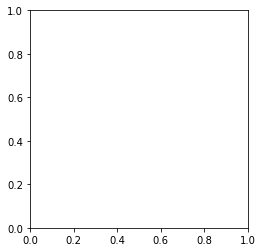

In [153]:
plt.imshow(np.asarray(df2.iloc[0,0]))